In [867]:
# Importing all packeges and functions that will be used in the assignment.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Preprocessing

In [868]:

# Load and show the data
songs = pd.read_csv("../Data/SpotifyFeatures.csv")
# Create variables for samples and features
samples, features = songs.shape
# Print the number of samples, features and the table itself to see if it works properly.
#print(songs)
print(f'There are {samples} samples in the dataset.')
print(f'There are {features} features in the dataset.')

There are 232725 samples in the dataset.
There are 18 features in the dataset.


In [869]:
# Filter the data by genre - Pop and Classical
pop_music = songs[songs['genre'] == 'Pop'].copy()
clas_music = songs[songs['genre'] == 'Classical'].copy()

# Create labels 1 for Pop and 0 for Classical music
pop_music.loc[:, 'label'] = 1
clas_music.loc[:, 'label'] = 0

# Print how many samples(songs) does our data contain
pop_number = pop_music.shape[0]
class_number = clas_music.shape[0]
print(f'There are {pop_number} Pop music songs.')
print(f'There are {class_number} Classical music songs.')

# Extract Liveness and Loudness features for Pop music and then for Classical music
pop_features = pop_music[['liveness', 'loudness']].values
pop_labels = pop_music['label'].values

clas_features = clas_music[['liveness', 'loudness']].values
clas_labels = clas_music['label'].values

# Combine Pop music data with Classical music data
features = np.vstack((pop_features, clas_features))
labels = np.concatenate((pop_labels, clas_labels))

There are 9386 Pop music songs.
There are 9256 Classical music songs.


In [870]:
#Create variable that represents ratio of samples we want to use for training
training = 0.8

#Calculate how many samples will be used for training
training_samples = int(len(features) * training)

#Add shuffling of data for better training

#Create reproducibility, so we will get the same output every time
np.random.seed(32)
#Create an array of indices and shuffle data
indices = np.arange(len(features)) 
np.random.shuffle(indices)    
features_shuffled = features[indices]
labels_shuffled = labels[indices]

#Split the data into training and test sets

#Training should be 80% of all samples.
X_train = features_shuffled[:training_samples]    
y_train = labels_shuffled[:training_samples]      

#Testing should be 20% of all samples.
X_test = features_shuffled[training_samples:]     
y_test = labels_shuffled[training_samples:]   

#We can test it by printing training set and test set.
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Test set has {X_test.shape[0]} samples.")

Training set has 14913 samples.
Test set has 3729 samples.


Alternative way to split the data into two sets is by using "train_test_split".

In [871]:
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=30)

#print(f"Training set has {X_train.shape[0]} samples.")
#print(f"Test set has {X_test.shape[0]} samples.")

In [872]:
# Function to scale the dataset
def scaler(X):

    # Calculate the mean and standard deviation for each feature
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    # Scale the dataset by subtracting the mean and dividing by the standard deviation
    scaled_X = (X - mean) / std
    
    return scaled_X, mean, std

# Example usage
# Assuming X_train and X_test are your training and test datasets
scaled_X_train, _, _ = scaler(X_train)

# Use the same mean and std from training to scale the test set
scaled_X_test, _, _ = scaler(X_test)

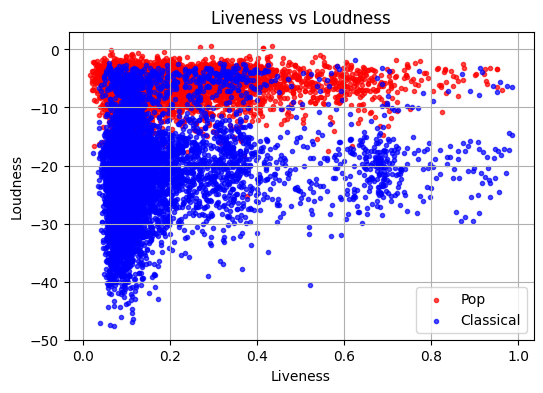

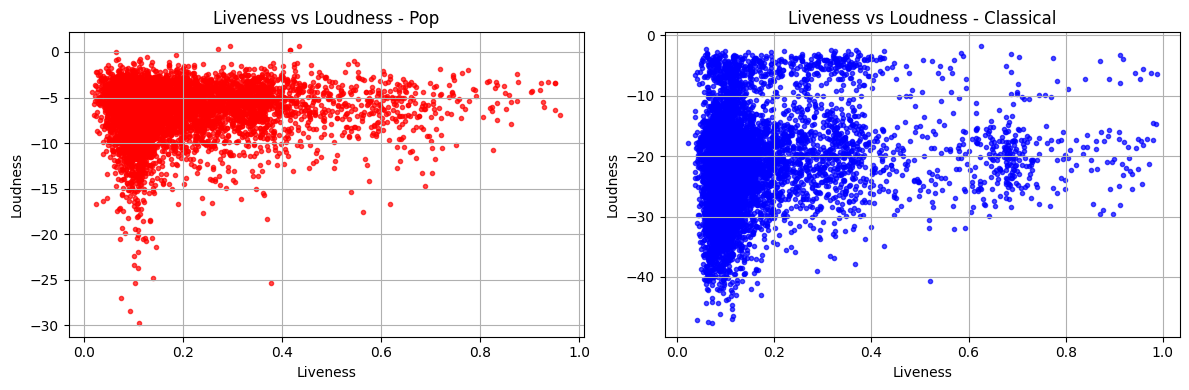

In [873]:
#Make a plot of the "liveness vs loudness" for Pop and Classical songs together
plt.figure(figsize=(6, 4))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Pop', alpha=0.7, marker=".")
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Classical', alpha=0.7, marker=".")
plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Liveness vs Loudness')
plt.legend()
plt.grid(True)
plt.show()

#Create a subplot for Pop and Classical plots to observe data separately
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

#Plot of Pop songs
ax1.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', alpha=0.7, marker=".")
ax1.set_xlabel('Liveness')
ax1.set_ylabel('Loudness')
ax1.set_title('Liveness vs Loudness - Pop')
ax1.grid(True)

#Plot of Classical songs
ax2.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', alpha=0.7, marker=".")
ax2.set_xlabel('Liveness')
ax2.set_ylabel('Loudness')
ax2.set_title('Liveness vs Loudness - Classical')
ax2.grid(True)

#Adjust the layout
plt.tight_layout()
plt.show()

# Machine Learning

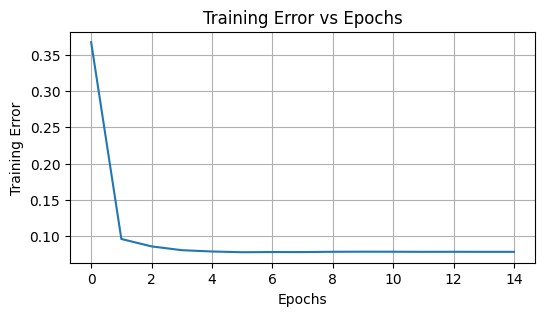

Training Accuracy: 92.19%
Test Accuracy: 91.71%


In [874]:
#Function for Min-Max scaling without sklearn
def min_max_scaling(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_min) / (X_max - X_min)

# Scale the features
X_train_scaled = min_max_scaling(X_train)
X_test_scaled = min_max_scaling(X_test)

#Create Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Create Prediction function
def predict(x, weights):
    z = x @ weights
    y_pred = sigmoid(z)
    #Return y_pred by using binary classification
    return (y_pred >= 0.5).astype(int)

#Create Stochastic gradient descent function
def stochastic_gradient_descent(x, y, learning_rate, epochs):
    #Initialize weights randomly
    weights = np.random.randn(x.shape[1])
    #List to store the training error at each epoch
    training_errors = []

    for epoch in range(epochs):
        #Shuffle the training data at the beginning of each epoch
    
        #Create an array of indices
        #indices = np.arange(x.shape[0])
        #Shuffle the indices
        #np.random.shuffle(indices)
        #Shuffle features (x)
        #x = x[indices]
        #Shuffle labels (y)
        #y = y[indices]
 
        for i in range(x.shape[0]):
            X = x[i]
            Y = y[i]

            #Predict the probability for the sample

            #Linear combination
            z = X @ weights
            #Apply sigmoid
            y_predicted = sigmoid(z)
            #Calculate the error
            error = y_predicted - Y
            #Update weights based on the gradient of the error
            weights -= learning_rate * X * error
        
        #Compute the error for the entire dataset after each epoch
        y_predict_all = predict(x, weights)
        errors = np.mean(y_predict_all != y)
        training_errors.append(errors)

    return weights, training_errors

# Shuffle data
indices = np.random.permutation(len(X_train))  # Shuffle indices
X_shuffled = scaled_X_train[indices]  # Apply the shuffled indices to features
y_shuffled = y_train[indices]  # Apply the shuffled indices to labels

#Introduce parameters such as epochs and training rate
training_rate = 0.0001
epochs = 15
# Train the logistic regression classifier using SGD
weights, errors = stochastic_gradient_descent(X_shuffled, y_shuffled, training_rate, epochs)
# weights, errors = stochastic_gradient_descent(scaled_X_test, y_train, training_rate, epochs)

# Make a plot of training error as a function of epochs
plt.figure(figsize=(6, 3))
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('Training Error vs Epochs')
plt.grid()
plt.show()

#Calculate training accuracy
y_train_pred = predict(scaled_X_train, weights)
train_accuracy = np.mean(y_train_pred == y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

#Calculate test accuracy
y_test_predicted = predict(scaled_X_test, weights)
test_accuracy = np.mean(y_test_predicted == y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

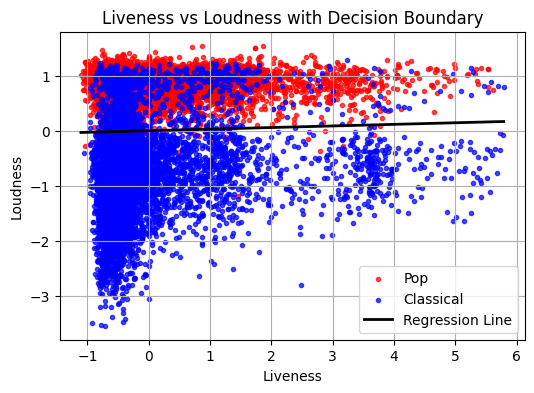

In [875]:
w_liveness = weights[0]  # Weight for 'liveness'
w_loudness = weights[1]  # Weight for 'loudness'

# Generate liveness values for plotting (covering the full range)
x1_range = np.linspace(scaled_X_train[:, 0].min(), scaled_X_train[:, 0].max(), 100)

# Calculate the corresponding loudness values using the boundary equation
x2_range = -(w_liveness * x1_range)/ w_loudness

# Plot the training data (Pop and Classical songs)
plt.figure(figsize=(6, 4))
plt.scatter(scaled_X_train[y_train == 1][:, 0], scaled_X_train[y_train == 1][:, 1], color='red', label='Pop', alpha=0.7, marker='.')
plt.scatter(scaled_X_train[y_train == 0][:, 0], scaled_X_train[y_train == 0][:, 1], color='blue', label='Classical', alpha=0.7, marker='.')

# Plot the decision boundary (using weights)
plt.plot(x1_range, x2_range, color='black', label='Regression Line', linewidth=2)

plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Liveness vs Loudness with Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

# Results

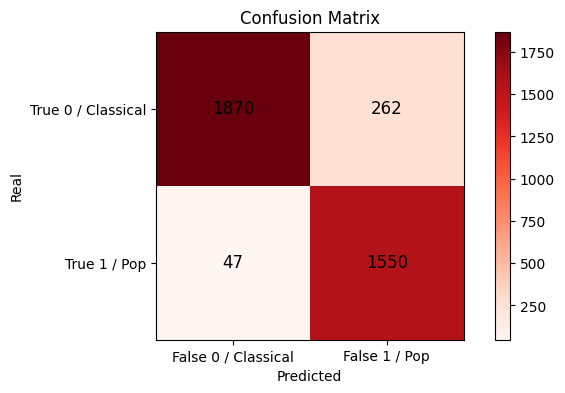

Confusion Matrix:
[[1870  262]
 [  47 1550]]
True Positives: 1870, False Positives: 262
False Negatives: 47, True Negatives: 1550


In [876]:
#Function to create confusion matrix
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[TP, FP], [FN, TN]])

#Use the function to create confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_predicted)

#Extract the values from the confusion matrix
TP, FP = conf_matrix[0]
FN, TN = conf_matrix[1]

#Create plot of the confusion matrix
plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Reds')
plt.colorbar()
plt.xticks([0, 1], ['False 0 / Classical', 'False 1 / Pop'])
plt.yticks([0, 1], ['True 0 / Classical', 'True 1 / Pop'])

#Add values to confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)

plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

#Print number of true positives, false positives, false negatives, and true negatives
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives: {TP}, False Positives: {FP}")
print(f"False Negatives: {FN}, True Negatives: {TN}")
